<a href="https://colab.research.google.com/github/EslamKampoza/Deep-Learning-Crash-Course-on-Youtube-/blob/main/mlearningKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install metric-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.8 MB/s 


In [6]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
#from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
import smote

In [7]:
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()


In [8]:
train = pd.read_csv('WISDM.csv',header=None)
train = train[(train != '?').all(axis=1)]
#test = pd.read_csv('test.csv')
labels = train[train.columns[len(train.columns)-1]]
Data = train[train.columns[:-1]]
peek=train.head()
print(peek)
print(train.shape)

   0     1     2     3     4     5     6     7     8     9   ...      35  \
0  33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  0.13  0.13  ...  293.94   
1  33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  0.09  0.12  ...  269.44   
2  33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  0.08  0.05  ...  248.65   
3  33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  0.10  0.14  ...  709.09   
4  33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  0.11  0.08  ...    3300   

        36    37    38    39    40    41    42     43       44  
0     1550  3.29  7.21  4.00  4.05  8.17  4.05  11.96  Jogging  
1  1233.33  4.23  6.88  4.05  5.43  8.19  5.43  12.05  Jogging  
2     1780  4.18  6.89  4.07  5.55  8.19  5.55  11.99  Jogging  
3     1380  2.26  4.13  2.49  2.87  4.95  2.87  10.69  Walking  
4     1775  2.29  3.94  2.41  3.08  4.64  3.08  10.80  Walking  

[5 rows x 45 columns]
(4944, 45)


In [11]:
import metric_learn

In [13]:
encoder = LabelEncoder()

#encoding test labels

encoder.fit(labels)
labels_int = encoder.transform(labels)

In [14]:
mmc = metric_learn.MMC_Supervised()
X_mmc = mmc.fit_transform(Data, labels_int)

In [17]:
Data.shape

(4944, 44)

In [16]:
X_mmc.shape

(4944, 44)

In [19]:
MM = mmc.get_mahalanobis_matrix()

In [20]:
MM.shape

(44, 44)

In [22]:
from sklearn.model_selection import train_test_split
Data, X_test, labels, y_test = train_test_split(Data, labels, test_size=0.20, random_state=42)

In [23]:
encoder = LabelEncoder()

#encoding test labels

encoder.fit(y_test)
testLabelE = encoder.transform(y_test)

#encoding train labels

encoder.fit(labels)
trainLabelE = encoder.transform(labels)


In [25]:
scaler = MinMaxScaler()
scaler.fit(Data)
trainData = scaler.transform(Data)
testData = scaler.transform(X_test)

K-Nearest Neighbors Accuracy: 0.82710
Confusion matrix, without normalization
[[ 33   1   0   0  18  54]
 [  2 328   0   0   1   5]
 [  1   0  18   1   0   1]
 [  2   1   0  11   1   3]
 [ 19   4   0   0  39  42]
 [ 12   0   0   0   3 389]]


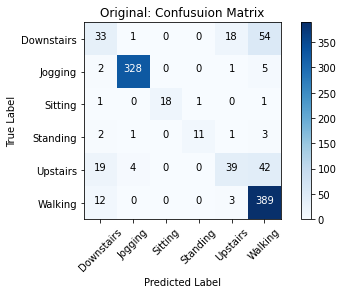

              precision    recall  f1-score   support

           0       0.48      0.31      0.38       106
           1       0.98      0.98      0.98       336
           2       1.00      0.86      0.92        21
           3       0.92      0.61      0.73        18
           4       0.63      0.38      0.47       104
           5       0.79      0.96      0.87       404

    accuracy                           0.83       989
   macro avg       0.80      0.68      0.72       989
weighted avg       0.81      0.83      0.81       989



In [27]:
clf2= KNeighborsClassifier(n_neighbors=12)
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))

K-Nearest Neighbors Accuracy: 0.86653
Confusion matrix, without normalization
[[ 60   1   0   0  13  32]
 [  2 328   0   0   1   5]
 [  1   0  15   1   2   2]
 [  2   1   0  10   5   0]
 [ 28   3   0   0  53  20]
 [  9   0   0   0   4 391]]


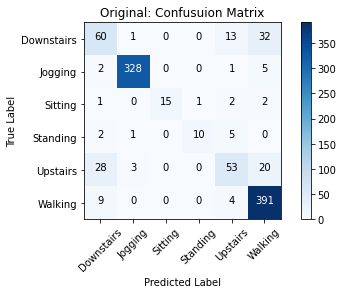

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       106
           1       0.98      0.98      0.98       336
           2       1.00      0.71      0.83        21
           3       0.91      0.56      0.69        18
           4       0.68      0.51      0.58       104
           5       0.87      0.97      0.92       404

    accuracy                           0.87       989
   macro avg       0.84      0.71      0.76       989
weighted avg       0.86      0.87      0.86       989



In [28]:
clf2= KNeighborsClassifier(n_neighbors=12, metric = mmc.get_metric())
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))